<a href="https://colab.research.google.com/github/VitorSRamos/FAE/blob/main/Aula%205%20-%20Estat%C3%ADstica/aula5_exercs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import factorial, exp
from numpy import mean, std, polyfit, log, sqrt, diag
import matplotlib.pyplot as plt

def binomial(n, k, p): # Binomial de k acertos com n tentativas, probabilidade p
    return ( factorial(n) / (factorial(k) * factorial(n-k)) ) * (p**k) * ( (1-p)**(n-k) )

#binomial(720, 2, 1/365)

def poisson(k, l): # Poisson de k ocorrências com l esperadas em um intervalo (l no lugar de lambda)
    return ( exp(-l) * l**k ) / factorial(k)

# Problema 3

## 3.7.2


Erro padrão:
\begin{equation}
    \sigma_{\bar x} = \frac{\sigma_x}{\sqrt N}
\end{equation}

In [ ]:
data_g = [9.9, 9.68, 9.57, 9.72, 9.8]
erro_pad = std(data_g) / sqrt(len(data_g))
print('Estimativa Padrão: {} +- {}'.format(mean(data_g), erro_pad))

Estimativa Padrão: 9.734 +- 0.04976745924798658


5

## 3.7.3


In [ ]:
data_fem = [1.62, 1.71, 1.80, 1.76, 1.68]
erro_pad = std(data_fem) / sqrt(len(data_fem))
print('Estimativa Padrão: {} +- {}'.format(mean(data_fem), erro_pad))

Estimativa Padrão: 1.714 +- 0.027942798714516763


## 3.7.5

Compatível se:
\begin{equation}
    |x_{\text{ref}} - \bar x| < 2 \sigma_{\bar x} \Rightarrow 2 \sigma_{\bar x} - |x_{\text{ref}} - \bar x| > 0
\end{equation}

In [ ]:
data_e = [1.72, 1.75, 1.62] # todos em unidades de 10^-19 C
sigma_e = [0.04, 0.07, 0.03]
e_ref = 1.602117733

print(2*sigma_e[0] - abs(e_ref - data_e[0]))
print(2*sigma_e[1] - abs(e_ref - data_e[1]))
print(2*sigma_e[2] - abs(e_ref - data_e[2]))

-0.03788226699999993
-0.007882266999999943
0.042117732999999935


## 3.7.7

In [ ]:
data_rho = [1.9, 1.9, 1.8, 2.0, 1.9] # todas em g/cm^3
rho_ref = 1.8524

erro_pad = std(data_rho) / sqrt(len(data_rho))
print('Estimativa Padrão: {} +- {}'.format(mean(data_rho), erro_pad))

print(2*erro_pad - abs(rho_ref - mean(data_rho))) # Compatíveis porque é positivo.

Estimativa Padrão: 1.9 +- 0.02828427124746189
0.008968542494923917


## 3.7.9

\begin{equation} 
    \bar x = \frac{\sum_{i=1}^N \frac{x_i}{\sigma_i^2}}{\sum_{i=1}^N \frac{1}{\sigma_i^2}}
\end{equation}
\begin{equation} 
    \sigma_{\bar x} = \frac{1}{\sqrt{\sum_{i=1}^N \frac{1}{\sigma_i^2}}}
\end{equation}

Note que existem dois somatórios que compõe as duas grandezas: $\sum_{i=1}^N \frac{x_i}{\sigma_i^2}$ e $\sum_{i=1}^N \frac{1}{\sigma_i^2}$

In [ ]:
data_mtop = [179, 176.1] # GeV/c^2
sigma_mtop = [5.1, 6.6]

# Inicializando os somatórios
sum_x_sigma = 0
sum_1_sigma = 0

# Loop para efetuar os somatórios
for index in range(len(data_mtop)):
    sum_x_sigma += data_mtop[index] / ((sigma_mtop[index])**2)
    sum_1_sigma += 1 / ((sigma_mtop[index])**2)
    #print(data_mtop[index], sigma_mtop[index])
    #print(sum_1_sigma)
# Combinando os somatórios para construir x_med e sigma_med

x_med = sum_x_sigma / sum_1_sigma

sigma_med = 1 / sqrt( sum_1_sigma )

# Printando resultados
print('A combinação das data_mtop resulta em: {} +- {} GeV/c^2'.format(x_med, sigma_med))

A combinação das data_mtop resulta em: 177.9157826649418 +- 4.035553507100052 GeV/c^2


## 3.7.10

In [ ]:
g_aluno = 9.5
sigma_g = 0.1
g_ref = 9.78791660

print(2*sigma_g - abs(g_ref - g_aluno)) # Compatíveis se positivo.

-0.08791660000000084


## 3.7.11

Seguindo a solução do exercício 3.7.9:

In [ ]:
data_fem = [1.022, 1.018] # V
sigma_fem = [0.01, 0.004] 

# Inicializando os somatórios
sum_x_sigma = 0
sum_1_sigma = 0

# Loop para efetuar os somatórios
for index in range(len(data_fem)):
    sum_x_sigma += data_fem[index] / ((sigma_fem[index])**2)
    sum_1_sigma += 1 / ((sigma_fem[index])**2)
    #print(data_fem[index], sigma_fem[index])
    #print(sum_1_sigma)
# Combinando os somatórios para construir x_med e sigma_med

x_med = sum_x_sigma / sum_1_sigma

sigma_med = 1 / sqrt( sum_1_sigma )

# Printando resultados
print('A combinação das f.e.m. resulta em: {} +- {} V'.format(x_med, sigma_med))

A combinação das f.e.m. resulta em: 1.018551724137931 +- 0.003713906763541037 V


# Problema 4

As partículas escolhidas foram:
\begin{gather}
    \text{Elétron: }0.5109989461 \pm 0.0000000031  \text{ MeV}\\
    \text{Neutron: }939.5654133 \pm 0.0000058  \text{ MeV}\\
    \text{Proton:  }938.2720813 \pm 0.0000058  \text{ MeV}\\
    \text{Tau: }1776.86 \pm 0.12  \text{ MeV}\\
    \text{Muon: }105.6583745 \pm 0.0000024 \text{ MeV} \\
\end{gather}

Seguindo a solução do exercício 3.7.9:

In [ ]:
massas = [0.5109989461, 939.5654133, 938.2720813, 1776.86, 105.6583745]
erros = [0.0000000031, 0.0000058, 0.0000058, 0.12, 0.0000024]

# Inicializando os somatórios
sum_x_sigma = 0
sum_1_sigma = 0

# Loop para efetuar os somatórios
for index in range(len(massas)):
    sum_x_sigma += massas[index] / ((erros[index])**2)
    sum_1_sigma += 1 / ((erros[index])**2)
    #print(massas[index], erros[index])
    #print(sum_1_sigma)
# Combinando os somatórios para construir x_med e sigma_med

x_med = sum_x_sigma / sum_1_sigma

sigma_med = 1 / sqrt( sum_1_sigma )

# Printando resultados
print('A combinação das massas resulta em: {} +- {} MeV'.format(x_med, sigma_med))

A combinação das massas resulta em: 0.5117105259782423 +- 3.099996528398886e-09 MeV


In [ ]:
1 / ( 1/erros[0]**2 + 1/erros[1]**2 + 1/erros[2]**2 + 1/erros[3]**2 + 1/erros[4]**2 )**0.5

0.4472135954999579

# Problema 14


## Item a)

In [ ]:
m = 0
dist = []
n_acertos = []

while m <= 15:
    n_acertos.append(m)
    n_pessoas = binomial(15, m, 0.25)
    print('{}% das pessoas acertariam {} questões'.format(100*n_pessoas, m))
    dist.append(n_pessoas)
    m +=1

1.3363461010158062% das pessoas acertariam 0 questões
6.681730505079031% das pessoas acertariam 1 questões
15.590704511851072% das pessoas acertariam 2 questões
22.519906517118216% das pessoas acertariam 3 questões
22.519906517118216% das pessoas acertariam 4 questões
16.514598112553358% das pessoas acertariam 5 questões
9.17477672919631% das pessoas acertariam 6 questões
3.9320471696555614% das pessoas acertariam 7 questões
1.3106823898851871% das pessoas acertariam 8 questões
0.33980654552578926% das pessoas acertariam 9 questões
0.06796130910515785% das pessoas acertariam 10 questões
0.010297168046236038% das pessoas acertariam 11 questões
0.0011441297829151154% das pessoas acertariam 12 questões
8.800998330116272e-05% das pessoas acertariam 13 questões
4.190951585769653e-06% das pessoas acertariam 14 questões
9.313225746154785e-08% das pessoas acertariam 15 questões


## Item b)

<BarContainer object of 16 artists>

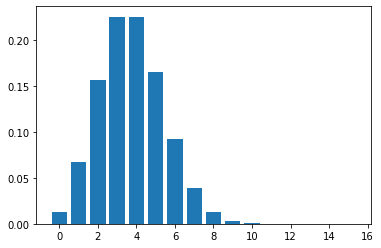

In [ ]:
plt.bar(n_acertos, dist)

## Item c)

In [ ]:
prob_3 = sum(dist[3:]) # somando as probabilidades de 3 ou mais acertos
print('{} pessoas dentre 1000 acertariam ao menos 3 questões'.format(int(1000*prob_3))) # arredondando para baixo com int porque não são 764 pessoas.

763 pessoas dentre 1000 acertariam ao menos 3 questões


# Problema 15

In [ ]:
f_m = [57, 203, 383, 525, 532, 408, 273, 139, 45, 27, 10, 4, 2, 0, 0]
m = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

15

## Item a)

\begin{equation}
 <m> = \frac{1}{2608}\sum_{m=0}^{14} m f_m
\end{equation}

In [ ]:
m_sum = 0
for index in range(len(m)):
    m_sum += m[index] * f_m[index]

m_med = (1/2608) * m_sum

print('O valor médio de contagens é {} por intervalo'.format(m_med))

O valor médio de contagens é 3.870398773006135


## Item b)

In [ ]:
f_poisson = []

for item in m:
    f_poisson.append(poisson(item, m_med) * 2608) # multiplicado por 2608 para "desnormalizar"

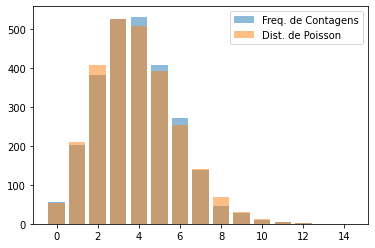

In [ ]:
plt.bar(m, f_m, alpha=0.5, label='Freq. de Contagens')
plt.bar(m, f_poisson, alpha=0.5, label='Dist. de Poisson')
plt.legend()

# Problema 18

Dado que os erros são aproximadamente constantes, pode-se fazer o ajuste ignorando os erros.
\begin{equation}
    D = k E^{1/4}
\end{equation}

In [ ]:
D = [4.9, 6.7, 7.3, 8.1, 9.2]
E = [0.07, 0.18, 0.3, 0.45, 0.69]
#epsilon_D = [0.3, 0.3, 0.4, 0.4, 0.4]
E14 = [item**(1/4) for item in E]

coefs, cov = polyfit(E14, D, 1, cov=True)

errors = sqrt(diag(cov)) # erro dado pela diagonal da matriz de covariancia

print('O valor de k é de {} +- {}'.format(coefs[0], errors[0]))

[0.57841206 0.4280284 ]
O valor de k é de 10.469785383694187 +- 0.5784120576419957
